# Project: Wrangling and Analyze Data

## 1. Importing Libraries

For this project, I will use libraries to handle data frames, download files, and access the Twitter API. Let's import these packages into the Jupyter Notebook environment.

In [7]:
import pandas as pd
import requests
import numpy as np
import json         # Importing the json package to easy my task with json files
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 2. Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [8]:
df_arc = pd.read_csv("twitter-archive-enhanced.csv")
# df_arc.head()

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [9]:
# Let's dowload the Image Predictions file programmatically:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)

# Let's save the file
open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [10]:
# Read TSV file
df_img = pd.read_csv('image_predictions.tsv', sep = '\t')

# Checking the firstfew values of the dataset
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
# df_img = pd.read_csv("image-predictions.tsv", sep = "\t")
# df_img.tail()

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
"""import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_arc.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)"""

1: 892420643555336193


AttributeError: module 'tweepy' has no attribute 'TweepError'

## ERROR

AttributeError: module 'tweepy' has no attribute 'TweepError'

Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...

In [15]:
# I would like to read row by row and translate into pandas dataframe

df_list = []
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        parsed_json = json.loads(line)
        df_list.append({'tweet_id': parsed_json['id'],
                        'retweet_count': parsed_json['retweet_count'],
                        'favorite_count': parsed_json['favorite_count']})
        
df_tweet = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [16]:
# Check the table
df_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


**I have gathered all three datasets:**

- tweet_json.txt as **df_tweet**;
- image_predictions.tsv as **df_img**;
- twitter_archive_enhanced.csv as **df_arc**.

## 3. Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### 3.1 twitter_archive_enhanced.csv

In [17]:
# Firtsly look at the first 5 rows of the data set.
df_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [18]:
df_arc.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [19]:
# I coudn't read the columns because of column width. So I changed the column width. 
# pd.set_option('display.max_colwidth', 500000)
df_arc.tail(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


### 3.1.1 Quality Issue for twitter_archive_enhanced V1
**Quality**
-   **Visual Method**
1. Invalid names or "None" names (Column: name)

**Tidiness**
-   **Visual Method**
1. HTML tags, URL, and content in a single column.

In [20]:
# I would like to check names, is ther ecommon mistake or not.
df_arc["name"].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [21]:
# Pandas is not showing more what I expecting
# pd.set_option('display.max_rows', 5000)

In [22]:
df_arc["name"].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

**ISSUE: name's columns shows a higher number of wrong dogs names.**

- 55 occurrences of a;
- 8 occurrences of the;
- 7 occurrences of an, etc.

In [23]:
# Rates between 0 to 10 for "numerator".
df_arc["rating_numerator"].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [24]:
df_arc["rating_numerator"].max()

1776

In [25]:
df_arc["rating_numerator"].min()

0

In [26]:
# Rates between 0 to 10 for "denominator".
df_arc["rating_denominator"].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

**ISSUE: Numerator and denumerator ave problems. They must be between 0-10.**

### **Quality Issue for twitter_archive_enhanced V2**
**Quality**
-   **Visual Method**
1. Invalid names or "None" names (Column: name)

-   **Programmatic**
1. Invalid ratings, Max rate should be 10 not 1776 (Column: rating_numerator)
2. Invalid denominator, I expected fixed 10. (Column: rating_denominator)


**Tidiness**
-   **Visual Method**
1. HTML tags, URL, and content in a single column.

In [27]:
# An overview of the df_arc.
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**ISSUE:** I am not sure that retweeted and replied tweets are increasing the tweet_ID or not. Also it can affect the results of rating. So I need to check it as following codes. 

In [28]:
# Firstly, I need one of dublicated names. 
duplicated = df_arc[df_arc.duplicated('name')]
duplicated.name.head()

7       None
12      None
23    Canela
24      None
25      None
Name: name, dtype: object

In [29]:
# Lets chechk the "Canela"
Canela = df_arc.loc[df_arc["name"] == "Canela"]
Canela

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None


**Result of Retweeted / Replied Rows**

- Acc. to output tweet_id = "887473957103951883" is first tweet and tweet_id = "888202515573088257" is retweeted Id that 2 days after.
- After retweeted, retweeted_status_id is created. Retweet has same rating as original tweet. 

*Quality Issues are Updating Acc. To Info Function as Following List*

### **Quality Issue for twitter_archive_enhanced V3**
**Quality**
-   **Visual Method**
1. Invalid names or "None" names (Column: name)

-   **Programmatic**
1. Invalid ratings, Max rate should be 10 not 1776 (Column: rating_numerator)
2. Invalid denominator, I expected fixed 10. (Column: rating_denominator)
3. Convert to date format. (Column: timestamp)
4. It is similar to zip code, it must be a string. (Column: tweet_id)
5. Same dog retweeted so it can be dublicated records. (Column: retweeted_status_id)
6. Same dog replied so it can be dublicated records. (Column: in_reply_to_status_id)


**Tidiness**
-   **Visual Method**
1. HTML tags, URL, and content in a single column.

-   **Programmatic**
1. Categorical variable **translate into one column** as shown drug example shown in Udacity. (Column: doggo, floofer, pupper, and puppo)
2. There is two information in a single column. It should be two column as **text** and **URL**. (Column: text)

### 3.2 image_predictions.tsv

In [30]:
# Firtsly look at the first 5 rows of the data set.
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [31]:
df_img.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


### **Quality Issue for image_predictions.tsv V1**
**Quality**
-   **Visual Method**
1. Dog's breed is not standard, Capital Letter Issue. (Column: p1, p2, p3)



In [32]:
# An overview of the df_img.
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**ISSUE:** There is no non-null rows. Also Dtype problem for tweet_id column. other Dtypes are seems good.

### **Quality Issue for image_predictions.tsv V2**
**Quality**
-   **Visual Method**
1. Dog's breed is not standard, Capital Letter Issue. (Column: p1, p2, p3)

-   **Programmatic**
1. ID must be string. (Column: tweet_id)

In [33]:
# Is there any dublicated enties?

# Tweet ID
sum(df_img.tweet_id.duplicated())

0

In [34]:
# JPG URL
sum(df_img.jpg_url.duplicated())


66

**Thesis:** I proved the replies or retweets are increasing tweet_ID at previous chapter. And I have foccused "Canela". These kind of entries can cause the dublicated JPG Url. So following codings are to prove that. 

In [35]:
# I need to check Canela's tweet_ID is in the image_predictions database.
df_img.loc[df_img["tweet_id"] == 887473957103951883]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.05495,True,beagle,0.038915,True


In [36]:
# Yes! I found the Canela's row in the image_predictions database. And now I have the jpg_url.
# According to my thesis there should be two jpg url as same as Canela's image. 
df_img.loc[df_img["jpg_url"] == "https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg"]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.05495,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.05495,True,beagle,0.038915,True


**Result** of dublicated jpg_url: As we see same jpg_url represent to tweet and retweet. 

**ISSUE:** There is an algorithm to define the dog's breed. And there are 3 prediction. The image can be dog or not. I need to some how define the picture is dog or not. There for I can trust p1 or to more safe I can write a code for that issue. 

**My Suggestion:** If there is any False prediction image is not relevent to dog. If all predictions are True, image is relevent to dog. 

### **Quality Issue for image_predictions.tsv V3**
**Quality**
-   **Visual Method**
11. Dog's breed is not standard, Capital Letter Issue. (Column: p1, p2, p3)

-   **Programmatic**
12. ID must be string. (Column: tweet_id)
13. There is dublicated entries which are belongs to retweet or replies. (Column: jpg_url)
14. Merging these two tables (df_arc, df_twitter and df_img) into one. (Table: twitter_master)
15. **My Suggestion:** If there is any False prediction image is not relevent to dog. If all predictions are True, image is relevent to dog. 

### 3.3 tweet-json.json

In [37]:
df_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [38]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### *Aditional Quality Issue*:
I can reach three table as using tweet_id. So twitter_archive_enhanced.csv, tweet-json.json and image_predictions.tsv tables could be merged into one.

* tweet_id datatype must change to object as I mentioned above tables. So I can merge them all.

# Summary of Assessing Data

### **Quality Issue for tweet-json.json V1**
**Quality**
-   **Visual Method**
1. -

-   **Programmatic**
16. ID must be string. (Column: tweet_id)

# +

### **Quality Issue for image_predictions.tsv V3**
**Quality**
-   **Visual Method**
11. Dog's breed is not standard, Capital Letter Issue. (Column: p1, p2, p3)

-   **Programmatic**
12. ID must be string. (Column: tweet_id)
13. There is dublicated entries which are belongs to retweet or replies. (Column: jpg_url)
14. Merging these two tables (df_arc, df_twitter and df_img) into one. (Table: twitter_master)
15. **My Suggestion:** If there is any False prediction image is not relevent to dog. If all predictions are True, image is relevent to dog. 

# +

### **Quality Issue for twitter_archive_enhanced V3**
**Quality**
-   **Visual Method**
1. Invalid names or "None" names (Column: name)

-   **Programmatic**
2. Invalid ratings, Max rate should be 10 not 1776 (Column: rating_numerator)
3. Invalid denominator, I expected fixed 10. (Column: rating_denominator)
4. Convert to date format. (Column: timestamp)
5. It is similar to zip code, it must be a string. (Column: tweet_id)
6. Same dog retweeted so it can be dublicated records. (Column: retweeted_status_id)
7. Same dog replied so it can be dublicated records. (Column: in_reply_to_status_id)


**Tidiness**
-   **Visual Method**
8. HTML tags, URL, and content in a single column.

-   **Programmatic**
9. Categorical variable **translate into one column** as shown drug example shown in Udacity. (Column: doggo, floofer, pupper, and puppo)
10. There is two information in a single column. It should be two column as **text** and **URL**. (Column: text)

## 4. Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [39]:
# Make copies of original pieces of data

df_img_cleaned = df_img.copy()
df_arc_cleaned = df_arc.copy()
df_twt_cleaned = df_tweet.copy()

### Issue #1:

**13.** There is dublicated entries which are belongs to retweet or replies. (Column: jpg_url)

#### Define:

Remove the all dublicated IMG Url

#### Code

In [40]:
# Drop the dublicated values on "jpg_url" column.
df_img_cleaned = df_img.drop_duplicates(subset=["jpg_url"], keep="first")

#### Test

In [41]:
sum(df_img_cleaned["jpg_url"].duplicated())

0

### Issue #2:

6. Same dog retweeted so it can be dublicated records. (Column: retweeted_status_id)
7. Same dog replied so it can be dublicated records. (Column: in_reply_to_status_id)

#### Define

If the tweet have retweeted_status_id or  in_reply_to_status_id, remove.

#### Code

In [42]:
# If the "retweet id" or "reply id" is null, keep rows in dataframe.

df_arc_cleaned = df_arc_cleaned.loc[df_arc_cleaned["retweeted_status_id"].isnull()]
df_arc_cleaned = df_arc_cleaned.loc[df_arc_cleaned["in_reply_to_status_id"].isnull()]

#### Test

In [43]:
print("Number of rows with retweeted :", sum(df_arc_cleaned.retweeted_status_id.notnull()))
print("Number of rows with replied :", sum(df_arc_cleaned.retweeted_status_id.notnull()))
print("Number of rows with tweeted :", df_arc_cleaned.shape[0])

Number of rows with retweeted : 0
Number of rows with replied : 0
Number of rows with tweeted : 2097


The test shows both columns, retweeted_status_id and in_reply_to_status_id are null. All rows are belongs to first tweet id.

### Issue #3:

5. It is similar to zip code, it must be a string. (Column: tweet_id)

#### Define

Convert tweet id int to str

#### Code

In [44]:
# Converting the tweet_id to string.
df_arc_cleaned.tweet_id = df_arc_cleaned.tweet_id.astype(str)

#### Test

In [45]:
# I must see the "tweet_id" as object.
df_arc_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Issue #4:

12. ID must be string. (Column: tweet_id)

#### Define

Merge the df_arc_cleaned and df_img_cleaned to twitter_master

#### Code

In [46]:
# Converting the tweet_id to string.
df_img_cleaned.tweet_id = df_img_cleaned.tweet_id.astype(str)

C:\Users\bense\AppData\Local\Temp\ipykernel_6456\151213187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_img_cleaned.tweet_id = df_img_cleaned.tweet_id.astype(str)


#### Test

In [47]:
# I must see the "tweet_id" as object.
df_img_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2009 non-null   object 
 1   jpg_url   2009 non-null   object 
 2   img_num   2009 non-null   int64  
 3   p1        2009 non-null   object 
 4   p1_conf   2009 non-null   float64
 5   p1_dog    2009 non-null   bool   
 6   p2        2009 non-null   object 
 7   p2_conf   2009 non-null   float64
 8   p2_dog    2009 non-null   bool   
 9   p3        2009 non-null   object 
 10  p3_conf   2009 non-null   float64
 11  p3_dog    2009 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


### Issue #5:

14. Merging these two tables (df_arc_cleaned, df_tweet and df_img_cleaned) into twitter_master.

#### Define

df_arc_cleaned, df_tweet and df_img_cleaned tables will merge wit tweet_id. tweet_id colums should be same type. But I forget to change the df_tweet.

#### Code

In [48]:
# Converting the tweet_id to string.
df_tweet.tweet_id = df_tweet.tweet_id.astype(str)


In [49]:
# Creating the twitter_master.
df_twitter_master = pd.merge(df_arc_cleaned, df_img_cleaned, on = 'tweet_id')

In [50]:
# Add the df_tweet table to df_twitter_master table
df_twitter_master = pd.merge(df_twitter_master, df_tweet, on = 'tweet_id')

#### Test

In [51]:
# Shwo the table for testing.
df_twitter_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


In [52]:
a, b = df_arc_cleaned.shape[1], df_img_cleaned.shape[1]
print("df_arc_cleaned: {}, df_img_cleaned: {} | -1 column merged column".format(a,b))

df_arc_cleaned: 17, df_img_cleaned: 12 | -1 column merged column


In [53]:
# To check the columns. Is there 28 columns or not?
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1971 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1971 non-null   object 
 4   source                      1971 non-null   object 
 5   text                        1971 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1971 non-null   object 
 10  rating_numerator            1971 non-null   int64  
 11  rating_denominator          1971 non-null   int64  
 12  name                        1971 non-null   object 
 13  doggo                       1971 

### Issue #6:

1. Invalid names or "None" names (Column: name)

#### Define

Rename non-standard names to "None".

#### Code

In [54]:
# Firstly I would like to check is there any pattern on name column. 
df_twitter_master.name.value_counts()

None          524
a              55
Charlie        11
Oliver         10
Cooper         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 935, dtype: int64

In [55]:
# There are 2 pattern. 1. "None" 2. non names are not starting capital letter. So I need to change non standard names with None.
# But before I need to list all non stanadard names (all lowercase) to sure that.

lowercase = []

for index in df_twitter_master.name:
    if index.islower():
        lowercase.append(index)
lowercase = list(set(lowercase))

lowercase

['infuriating',
 'his',
 'light',
 'just',
 'all',
 'the',
 'quite',
 'one',
 'not',
 'by',
 'this',
 'incredibly',
 'my',
 'officially',
 'such',
 'an',
 'getting',
 'space',
 'actually',
 'a',
 'unacceptable',
 'very']

As I tought, all lowercase names are actually non names. So I can change these with None. 

In [56]:
for index in lowercase:
    df_twitter_master.name.replace(index,"None", inplace = True)

#### Test

In [57]:
# To check is there any lowercase name in my database. List should be empty.
test = []

for index in df_twitter_master.name:
    if index.islower():
        test.append(index)
test = list(set(test))

test

[]

Finally I changed all non-names with "None". There is no no-name in my database.

### Issue #7:

8. HTML tags, URL, and content in a single column.

#### Define

There are two information in same column. These are should be separately.

**Example:** < a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone< /a>

I need to take between (< a href=") and (" rel="nofollow">). And Also (">) and(< /a>)

#### Code

In [58]:
source_twt = []
source_twt_url = []

for i in df_twitter_master.source:
    source_twt.append(i.split('</a')[0].split('">')[1])
    source_twt_url.append(i.split('rel="nofollow">')[0].split('<a href="')[1])

# append the source_twt list to df_twitter_master
df_twitter_master = pd.concat([df_twitter_master, pd.DataFrame(source_twt, columns = ['source_twt'])], axis = 1)

# append the source_twt_url list to df_twitter_master
df_twitter_master = pd.concat([df_twitter_master, pd.DataFrame(source_twt_url, columns = ['source_twt_url'])], axis = 1)

#### Test

In [59]:
# Lets check the our new columns with cource column.
df_twitter_master[['tweet_id','source','source_twt','source_twt_url']].head()

,tweet_id,source,source_twt,source_twt_url
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone,"http://twitter.com/download/iphone"""
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone,"http://twitter.com/download/iphone"""
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone,"http://twitter.com/download/iphone"""
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone,"http://twitter.com/download/iphone"""
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone,"http://twitter.com/download/iphone"""


In [60]:
# What is the situation of source_twt column.
df_twitter_master.source_twt.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source_twt, dtype: int64

### Issue #8:

10. There is two information in a single column. It should be two column as **text** and **URL**. (Column: text)

#### Define

It is same as above issue. Now we are in "text" column.

**Example:** This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB

I need to take the untill **https:** and begins with **https:**

#### Code

In [61]:
text_twt = []
text_twt_url = []

for i in df_twitter_master.text:
    text_twt.append(i.split('https:')[0])
    text_twt_url.append(i.split(' ')[-1])

# append the text_twt list to df_twitter_master
df_twitter_master = pd.concat([df_twitter_master, pd.DataFrame(text_twt, columns = ['text_twt'])], axis = 1)

# append the text_twt_url list to df_twitter_master
df_twitter_master = pd.concat([df_twitter_master, pd.DataFrame(text_twt_url, columns = ['text_twt_url'])], axis = 1)

#### Test

In [62]:
# Lets check the our new columns with cource column.
df_twitter_master[['tweet_id','text','text_twt','text_twt_url']].head()

,tweet_id,text,text_twt,text_twt_url
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,This is Phineas. He's a mystical boy. Only eve...,https://t.co/MgUWQ76dJU
1,892177421306343426,This is Tilly. She's just checking pup on you....,This is Tilly. She's just checking pup on you....,https://t.co/0Xxu71qeIV
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,This is Archie. He is a rare Norwegian Pouncin...,https://t.co/wUnZnhtVJB
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,This is Darla. She commenced a snooze mid meal...,https://t.co/tD36da7qLQ
4,891327558926688256,This is Franklin. He would like you to stop ca...,This is Franklin. He would like you to stop ca...,https://t.co/AtUZn91f7f


### Issue #9:

2. Invalid ratings, Max rate should be 10 not 1776 (Column: rating_numerator)
3. Invalid denominator, I expected fixed 10. (Column: rating_denominator)

**Conculusion:** Denomiator should be constant and max nominator should be equal to max denomiator to reach higest rate 1.00.

#### Define

- Calculate the rate
- If the rate higer than 1.00, change with 1.00

#### Code

In [63]:
df_twitter_master['rating_ratio'] = df_twitter_master.rating_numerator / df_twitter_master.rating_denominator
df_twitter_master['rating_ratio'].value_counts()

1.200000      450
1.000000      419
1.100000      397
1.300000      253
0.900000      150
0.800000       95
0.700000       51
0.500000       34
1.400000       33
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
2.700000        1
7.500000        1
3.428571        1
0.000000        1
177.600000      1
0.818182        1
0.636364        1
2.600000        1
42.000000       1
Name: rating_ratio, dtype: int64

In [64]:
df_twitter_master['rating_ratio_cleaned'] = df_twitter_master['rating_ratio']
df_twitter_master.loc[df_twitter_master['rating_ratio'] > 1, 'rating_ratio_cleaned'] = 1

#### Test

In [65]:
df_twitter_master['rating_ratio_cleaned'].value_counts()

1.000000    1558
0.900000     150
0.800000      95
0.700000      51
0.500000      34
0.600000      32
0.300000      19
0.400000      15
0.200000      10
0.100000       4
0.000000       1
0.818182       1
0.636364       1
Name: rating_ratio_cleaned, dtype: int64

**Result:** All rate are in 0-1 range. 

### Issue #10:

9. Categorical variable **translate into one column** as shown drug example shown in Udacity. (Column: doggo, floofer, pupper, and puppo)

#### Define

Merge doggo, pupper, puppo, and floofer in one column.

**UPDATE!:** Check the each row have doggo or pupper or puppo or floofer or None. It shouldn't be more than one definition in same row.  
- If there is none change with "".
- Merge 4 column (doggo, pupper, puppo, and floofer)
- If there is a definition other than doggo, puppet, puppo, and floofer, there should be dublicated definition. 

#### Code

In [66]:
df_twitter_master.loc[df_twitter_master['doggo'] == "None", 'doggo'] = ""
df_twitter_master.loc[df_twitter_master['pupper'] == "None", 'pupper'] = ""
df_twitter_master.loc[df_twitter_master['puppo'] == "None", 'puppo'] = ""
df_twitter_master.loc[df_twitter_master['floofer'] == "None", 'floofer'] = ""

In [67]:
df_twitter_master['dog_category'] = df_twitter_master['doggo'] + df_twitter_master['pupper'] + df_twitter_master['puppo'] + df_twitter_master['floofer']

In [68]:
df_twitter_master['dog_category'].value_counts()

                1668
pupper           201
doggo             63
puppo             22
doggopupper        8
floofer            7
doggopuppo         1
doggofloofer       1
Name: dog_category, dtype: int64

In [69]:
# 1 Case Doggo and Floofer
# 1 Case Doggo and Puppo
# 8 Case Doggo nad Pupper

# I do not want to delete these rows. To keep them I will categorize as multidefinition

df_twitter_master.loc[df_twitter_master['dog_category'] == "", 'dog_category'] = "None"
df_twitter_master.loc[df_twitter_master['dog_category'] == "doggopupper", 'dog_category'] = "multidefinition"
df_twitter_master.loc[df_twitter_master['dog_category'] == "doggopuppo", 'dog_category'] = "multidefinition"
df_twitter_master.loc[df_twitter_master['dog_category'] == "doggofloofer", 'dog_category'] = "multidefinition"

#### Test

In [70]:
df_twitter_master['dog_category'].value_counts()

None               1668
pupper              201
doggo                63
puppo                22
multidefinition      10
floofer               7
Name: dog_category, dtype: int64

In [71]:
df_twitter_master[['dog_category']].tail()

,dog_category
1966,None
1967,None
1968,None
1969,None
1970,None


### Issue #11:

4. Convert to date format. (Column: timestamp)

**timestemp:** 2015-11-15 22:32:08 +0000

#### Define

Use the to_datetime function.

#### Code

In [72]:
df_twitter_master['timestamp'] = pd.to_datetime(df_twitter_master.timestamp)

#### Test

In [73]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1971 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1971 non-null   datetime64[ns, UTC]
 4   source                      1971 non-null   object             
 5   text                        1971 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1971 non-null   object             
 10  rating_numerator            1971 non-null   int64           

As we see timestamp column has datetime64 type.

### Issue #12:

11. Dog's breed is not standard, Capital Letter Issue. (Column: p1, p2, p3)

#### Define

1. All names to lower cases;
2. All spaces into an underscore, and;
3. All dash to underscore.

#### Code

In [74]:
def clean_name(name):
    name = list(map(lambda x : x.lower(), name ))
    name = list(map(lambda x : x.replace(' ','_'), name ))
    name = list(map(lambda x : x.replace('-','_'), name ))
    return name

In [75]:
df_twitter_master.p1 = clean_name(df_twitter_master.p1)
df_twitter_master.p2 = clean_name(df_twitter_master.p2)
df_twitter_master.p3 = clean_name(df_twitter_master.p3)

#### Test

In [76]:
df_twitter_master[['p1','p2','p3']].head(10)

,p1,p2,p3
0,orange,bagel,banana
1,chihuahua,pekinese,papillon
2,chihuahua,malamute,kelpie
3,paper_towel,labrador_retriever,spatula
4,basset,english_springer,german_short_haired_pointer
5,chesapeake_bay_retriever,irish_terrier,indian_elephant
6,appenzeller,border_collie,ice_lolly
7,pomeranian,eskimo_dog,pembroke
8,irish_terrier,irish_setter,chesapeake_bay_retriever
9,pembroke,cardigan,chihuahua


In [77]:
df_twitter_master[df_twitter_master['tweet_id'].str.contains('832273440279240704')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p3_dog,retweet_count,favorite_count,source_twt,source_twt_url,text_twt,text_twt_url,rating_ratio,rating_ratio_cleaned,dog_category
250,832273440279240704,NaN,NaN,2017-02-16 17:00:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Smiley. He's a blind therapy dogg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832273440...,...,True,2673,12385,Twitter for iPhone,"http://twitter.com/download/iphone""",Say hello to Smiley. He's a blind therapy dogg...,https://t.co/SHAb1wHjMz,1.4,1.0,doggo


In [78]:
# I SAW toilet_seat is Dog. So I controlled why is it?
a= df_twitter_master[df_twitter_master['tweet_id'].str.contains('832273440279240704')]
a['p3']

250    pug
Name: p3, dtype: object

### Issue #13:

15. **My Suggestion:** If there is any False prediction image is not relevent to dog. If all predictions are True, image is relevent to dog. 

#### Define

Check the p1_dog, p2_dog, p3_dog are True or False. If there is one false, the picture is not relevent to dog. But it is not logic. Because algorithm's 3th prediction can be more less accurate and even the picture is dog breed, 3th prediction can be not dog. 

**My Second Way:** Lets image the True confidence is (+) and False confidence (-). Assume that there is 3 confidecne, In this case if total confidence higer than 0 it can be more posible True. 

#### Code

In [79]:
# I Tried this but as I mentioned above it is not logic for me. 
# is_dog = ((df_twitter_master.p1_dog) & (df_twitter_master.p2_dog) & (df_twitter_master.p3_dog))
# df_twitter_master['is_dog'] = is_dog

In [80]:
# Test of "is_dog"
# df_twitter_master[['is_dog', 'p1_dog', 'p2_dog', 'p3_dog']].head()

In [81]:
# Cnahge the conf according to True or False 
for i in range(df_twitter_master.shape[0]):
    if df_twitter_master.loc[i, 'p1_dog'] == True:
        df_twitter_master.loc[i, 'p1_conf_a'] = df_twitter_master.loc[i, 'p1_conf'] 
    else:
        df_twitter_master.loc[i, 'p1_conf_a'] = df_twitter_master.loc[i, 'p1_conf'] * -1

for i in range(df_twitter_master.shape[0]):
    if df_twitter_master.loc[i, 'p2_dog'] == True:
        df_twitter_master.loc[i, 'p2_conf_a'] = df_twitter_master.loc[i, 'p2_conf'] 
    else:
        df_twitter_master.loc[i, 'p2_conf_a'] = df_twitter_master.loc[i, 'p2_conf'] * -1

for i in range(df_twitter_master.shape[0]):
    if df_twitter_master.loc[i, 'p3_dog'] == True:
        df_twitter_master.loc[i, 'p3_conf_a'] = df_twitter_master.loc[i, 'p3_conf'] 
    else:
        df_twitter_master.loc[i, 'p3_conf_a'] = df_twitter_master.loc[i, 'p3_conf'] * -1

# Calculate the "total_conf". 
df_twitter_master['total_conf'] = df_twitter_master['p1_conf_a'] + df_twitter_master['p2_conf_a'] + df_twitter_master['p3_conf_a']

# Decide the prediction is a breed of dog or not. 
for i in range(df_twitter_master.shape[0]):
    if df_twitter_master.loc[i, 'total_conf'] < 0:
        df_twitter_master.loc[i, 'is_dog_2'] = False
    else:
        df_twitter_master.loc[i, 'is_dog_2'] = True

In [82]:
for i in range(df_twitter_master.shape[0]):
    if df_twitter_master.loc[i, 'is_dog_2'] == True & df_twitter_master.loc[i, 'p1_dog'] == True:
        df_twitter_master.loc[i, 'breed_name'] = df_twitter_master.loc[i, 'p1'] 
    elif df_twitter_master.loc[i, 'is_dog_2'] == True & df_twitter_master.loc[i, 'p2_dog'] == True:
        df_twitter_master.loc[i, 'breed_name'] = df_twitter_master.loc[i, 'p2']
    elif df_twitter_master.loc[i, 'is_dog_2'] == True & df_twitter_master.loc[i, 'p3_dog'] == True:
        df_twitter_master.loc[i, 'breed_name'] = df_twitter_master.loc[i, 'p3']
    else:
        df_twitter_master.loc[i, 'breed_name'] = 'it is not important'

#### Test

In [83]:
# I wrote much thing. Lets check them is it working or not.
df_twitter_master[['p1_conf_a', 'p1_conf','p1_dog','p2_conf_a', 'p2_conf','p2_dog','p3_conf_a', 'p3_conf','p3_dog', 'total_conf', 'is_dog_2', 'breed_name']].head()

,p1_conf_a,p1_conf,p1_dog,p2_conf_a,p2_conf,p2_dog,p3_conf_a,p3_conf,p3_dog,total_conf,is_dog_2,breed_name
0,-0.097049,0.097049,False,-0.085851,0.085851,False,-0.076110,0.076110,False,-0.259010,False,it is not important
1,0.323581,0.323581,True,0.090647,0.090647,True,0.068957,0.068957,True,0.483184,True,chihuahua
2,0.716012,0.716012,True,0.078253,0.078253,True,0.031379,0.031379,True,0.825644,True,chihuahua
3,-0.170278,0.170278,False,0.168086,0.168086,True,-0.040836,0.040836,False,-0.043028,False,it is not important
4,0.555712,0.555712,True,0.225770,0.225770,True,0.175219,0.175219,True,0.956701,True,basset


It seems good. For example row 3: Even the p2_dog is true, total conf is minus... so decision is "False"

### Issue #14:

14. Clean the columns which is not needed.

#### Define

check the columns and defie the which columns are not needed and drop these columns.

#### Test

In [84]:
df_twitter_master.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,text_twt_url,rating_ratio,rating_ratio_cleaned,dog_category,p1_conf_a,p2_conf_a,p3_conf_a,total_conf,is_dog_2,breed_name
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,https://t.co/MgUWQ76dJU,1.3,1.0,None,-0.097049,-0.085851,-0.07611,-0.25901,False,it is not important


#### Code

In [85]:
df_twitter_master.columns.to_list()

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count',
 'source_twt',
 'source_twt_url',
 'text_twt',
 'text_twt_url',
 'rating_ratio',
 'rating_ratio_cleaned',
 'dog_category',
 'p1_conf_a',
 'p2_conf_a',
 'p3_conf_a',
 'total_conf',
 'is_dog_2',
 'breed_name']

**First Look I Do Not Need;**
-   in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, doggo, floofer, pupper, puppo


In [86]:
remove_list_1 = ["in_reply_to_status_id", "in_reply_to_user_id", "source", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "doggo", "floofer", "pupper", "puppo", 'img_num', 'p1_conf_a', 'p2_conf_a', 'p3_conf_a']

df_twitter_master_cleaned = df_twitter_master.drop(columns=remove_list_1) 

#### Test

In [87]:
df_twitter_master_cleaned.columns.to_list()

['tweet_id',
 'timestamp',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count',
 'source_twt',
 'source_twt_url',
 'text_twt',
 'text_twt_url',
 'rating_ratio',
 'rating_ratio_cleaned',
 'dog_category',
 'total_conf',
 'is_dog_2',
 'breed_name']

In [88]:
df_twitter_master_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   tweet_id              1971 non-null   object             
 1   timestamp             1971 non-null   datetime64[ns, UTC]
 2   text                  1971 non-null   object             
 3   expanded_urls         1971 non-null   object             
 4   rating_numerator      1971 non-null   int64              
 5   rating_denominator    1971 non-null   int64              
 6   name                  1971 non-null   object             
 7   jpg_url               1971 non-null   object             
 8   p1                    1971 non-null   object             
 9   p1_conf               1971 non-null   float64            
 10  p1_dog                1971 non-null   bool               
 11  p2                    1971 non-null   object             
 12  p2_con

In [89]:
df_twitter_master_cleaned.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,...,source_twt,source_twt_url,text_twt,text_twt_url,rating_ratio,rating_ratio_cleaned,dog_category,total_conf,is_dog_2,breed_name
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,...,Twitter for iPhone,"http://twitter.com/download/iphone""",This is Phineas. He's a mystical boy. Only eve...,https://t.co/MgUWQ76dJU,1.3,1.0,None,-0.259010,False,it is not important
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,...,Twitter for iPhone,"http://twitter.com/download/iphone""",This is Tilly. She's just checking pup on you....,https://t.co/0Xxu71qeIV,1.3,1.0,None,0.483184,True,chihuahua


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [90]:
# Saving the `twt_ach_mstr` as twitter_archive_master.csv.
df_twitter_master_cleaned.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [91]:
# Loading the twitter_archive_master.csv as a panda DataFrame.
df_master = pd.read_csv('twitter_archive_master.csv')

In [92]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1971 non-null   int64  
 1   timestamp             1971 non-null   object 
 2   text                  1971 non-null   object 
 3   expanded_urls         1971 non-null   object 
 4   rating_numerator      1971 non-null   int64  
 5   rating_denominator    1971 non-null   int64  
 6   name                  1971 non-null   object 
 7   jpg_url               1971 non-null   object 
 8   p1                    1971 non-null   object 
 9   p1_conf               1971 non-null   float64
 10  p1_dog                1971 non-null   bool   
 11  p2                    1971 non-null   object 
 12  p2_conf               1971 non-null   float64
 13  p2_dog                1971 non-null   bool   
 14  p3                    1971 non-null   object 
 15  p3_conf              

tweet_id and timestamp type is changed. But I will keep tweet_id for now.         

In [93]:
# Timestamp type changed. I need to change it again. 
df_master.timestamp = df_master.timestamp.apply(np.datetime64)

In [94]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tweet_id              1971 non-null   int64         
 1   timestamp             1971 non-null   datetime64[ns]
 2   text                  1971 non-null   object        
 3   expanded_urls         1971 non-null   object        
 4   rating_numerator      1971 non-null   int64         
 5   rating_denominator    1971 non-null   int64         
 6   name                  1971 non-null   object        
 7   jpg_url               1971 non-null   object        
 8   p1                    1971 non-null   object        
 9   p1_conf               1971 non-null   float64       
 10  p1_dog                1971 non-null   bool          
 11  p2                    1971 non-null   object        
 12  p2_conf               1971 non-null   float64       
 13  p2_dog            

### What I Have?
- 'tweet_id',
- 'timestamp',
- 'text',
- 'expanded_urls',
- 'rating_numerator',
- 'rating_denominator',
- 'name',
- 'jpg_url',
- 'p1',
- 'p1_conf',
- 'p1_dog',
- 'p2',
- 'p2_conf',
- 'p2_dog',
- 'p3',
- 'p3_conf',
- 'p3_dog',
- 'retweet_count',
- 'favorite_count',
- 'source_twt',
- 'source_twt_url',
- 'text_twt',
- 'text_twt_url',
- 'rating_ratio',
- 'rating_ratio_cleaned',
- 'dog_category'
- 'dog_category',
- 'total_conf',
- 'is_dog_2'

### Insights:

1. Is there any corelation between rating ratio, rating ratio cleaned and retweet or favorite

2. What is the data partition based on Dog Age Category?

3. What is the most common Dog breed for p1 algorithym?

4. What is the rate of true dog picture upload?

5. Is rate effecitng by the picture is related to dog or not?

6. What is the most popular dog type:
- By rating ratio
- By favorite count
- By retweet count

7. What is the most popular dog breed for p1 algorithym:
- By rating ratio
- By favorite count
- By retweet count



### Visualization

### 1. Is there any corelation between rating ratio, rating ratio cleaned and retweet or favorite

Text(0.5, 1.0, 'Correlation Heat-Map')

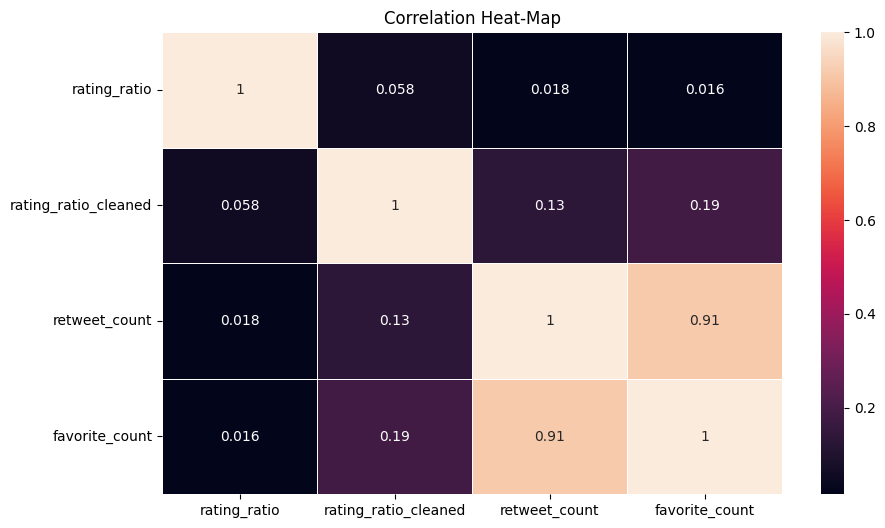

In [95]:
# Create Corelation Heat-Map

f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df_master[['rating_ratio','rating_ratio_cleaned','retweet_count','favorite_count']].corr(), annot=True, linewidths=.5)
plt.title('Correlation Heat-Map')

#### **Comment -1:**
- There is high corelation between reteweet and favorite of tweet. It was expecting that.
- Also there is slightly corelation between rating ratio and retweet and favorite. It was expecting but low corelation was not expecting.
- Cleaning of rating ratio effected the results. 

### 2. What is the data partition based on Dog Age Category?

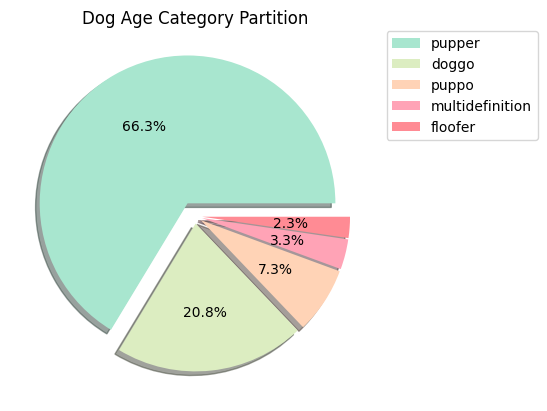

In [96]:
# Create dataframe for pie-chart
partition = df_master.dog_category.value_counts().to_frame()

# Drop the None values
partition = partition.drop('None')

# Plot the chart
colors = ['#a8e6cf','#dcedc1','#ffd3b6','#ffa3b6', '#ff8b94']

ax = partition.plot(kind="pie", y= 'dog_category', autopct='%1.1f%%', shadow=True, explode=[0.1, 0.05, 0.05, 0.05, 0.05], colors=colors, legend=True, title='Dog Age Category Partition', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

#### **Comment -2:**
- 66.3% of dogs are **pupper** stage.
- There is much not categorized ("None") row. So result can be affect by these dropped rows.

### 3. What is the most common Dog Breed for Breed Name?

In [97]:
df_master.query('is_dog_2 == True')['breed_name'].value_counts()[0:2]

golden_retriever      139
labrador_retriever     94
Name: breed_name, dtype: int64

There is a alot of dog breed in list. So I need to select top 10

In [98]:
# create dataframe for bar-chart
partition_breed = df_master.query('is_dog_2 == True')[['breed_name']].value_counts().to_frame()
# Other arrangements
colors = ['#a8e6cf','#dcedc1','#ffd3b6','#ffa3b6', '#ff8b94']
partition_breed = partition_breed.rename(columns={0 : 'count_dog_breed'})
# select the top ten
partition_breed = partition_breed.query('count_dog_breed > 28')

<AxesSubplot:title={'center':"Top 10 Count for Each Dog's Breed for 'breed_name' Algorithm"}, xlabel="Dog's Breed", ylabel='Count'>

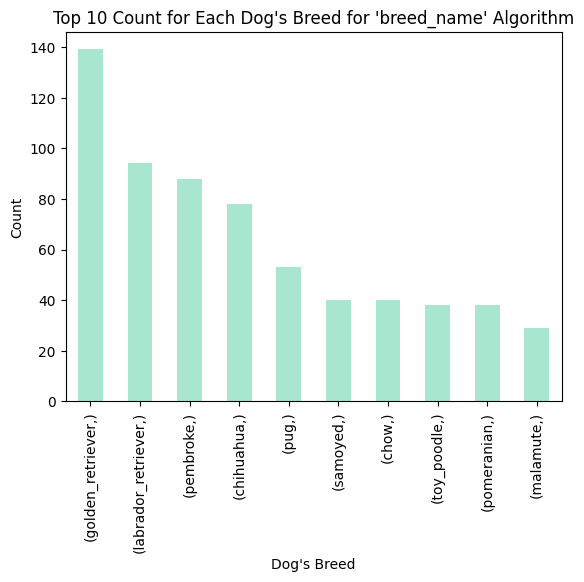

In [99]:
# Print the Plot
partition_breed.plot.bar(xlabel="Dog's Breed", ylabel='Count', title="Top 10 Count for Each Dog's Breed for 'breed_name' Algorithm", legend = False, color ='#a8e6cf')


### 4. What is the rate of true dog picture upload?

In [100]:
true_dog = df_master[['is_dog_2']].value_counts().to_frame()
true_dog = true_dog.rename(columns={0 : 'count_picture'})
true_dog
#true_dog["is_dog"][true_dog["is_dog"] == True] = "Real Dog Picture"
#true_dog["is_dog"][true_dog["is_dog"] == False] = "Not Real Dog Picture"
#true_dog.set_index('is_dog')

,count_picture
is_dog_2,
True,1475
False,496


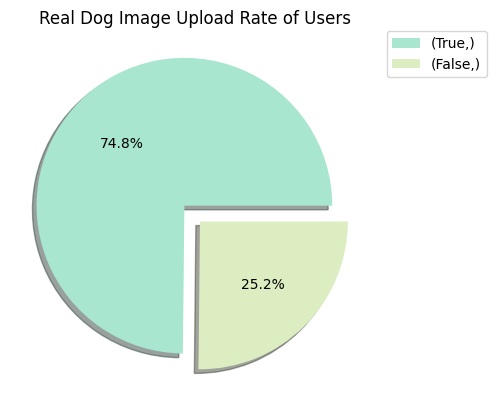

In [101]:
colors = ['#a8e6cf','#dcedc1','#ffd3b6','#ffa3b6', '#ff8b94']

ax = true_dog.plot(kind="pie", y= 'count_picture', autopct='%1.1f%%', shadow=True, explode=[0.1, 0.05], colors=colors, legend=True, title='Real Dog Image Upload Rate of Users', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

- 25.2% of uploaded pictures are not related the dog breed. 

### 5. Is rate affecting by the picture is related to dog or not?

In [102]:
fasle_dog_rate_mean = df_master.query('is_dog_2 == False')['rating_ratio_cleaned'].mean()

In [103]:
true_dog_rate_mean = df_master.query('is_dog_2 == True')['rating_ratio_cleaned'].mean()

<AxesSubplot:title={'center':'Uploaded Picture Rate Mean Dog (Ture) vs Not Dog(False)'}, ylabel='Rate Mean'>

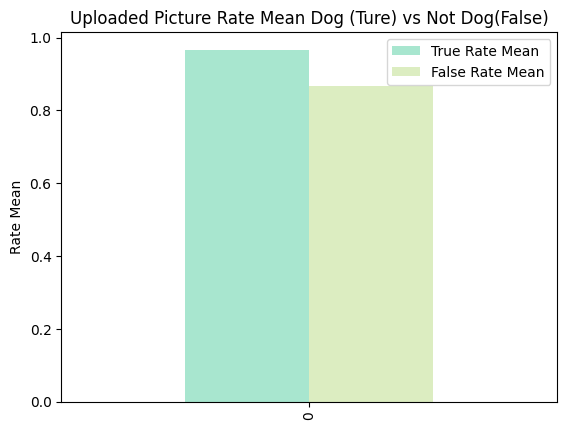

In [104]:
df_rate_data = {
    "True Rate Mean": [true_dog_rate_mean],
    "False Rate Mean": [fasle_dog_rate_mean]
}
df_rate = pd.DataFrame(df_rate_data)

df_rate.plot.bar( ylabel='Rate Mean', title="Uploaded Picture Rate Mean Dog (Ture) vs Not Dog(False)", legend = True, color =['#a8e6cf', '#dcedc1'])

- If users don't post dog pictures, they usually have a low score.

### 6. What is the most popular Dog Age Category Partition?
- By rating ratio
- By favorite count
- By retweet count

**6.1 By Rating Ratio**

In [105]:
df_master.query('dog_category != "None"').groupby('dog_category')['rating_ratio_cleaned'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_category,,,,,,,,
doggo,63.0,0.990476,0.042934,0.8,1.0,1.0,1.0,1.0
floofer,7.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
multidefinition,10.0,0.950000,0.158114,0.5,1.0,1.0,1.0,1.0
pupper,201.0,0.960199,0.098529,0.3,1.0,1.0,1.0,1.0
puppo,22.0,0.995455,0.021320,0.9,1.0,1.0,1.0,1.0


- All **floofers** have 10/10. 
- Also all dog age categories have high score

**6.2 By Favorite**

In [106]:
df_favorite_rate = df_master.query('dog_category != "None"').groupby('dog_category')[['favorite_count']].sum()
df_favorite_rate

,favorite_count
dog_category,
doggo,1219452
floofer,92442
multidefinition,170772
pupper,1457356
puppo,474806


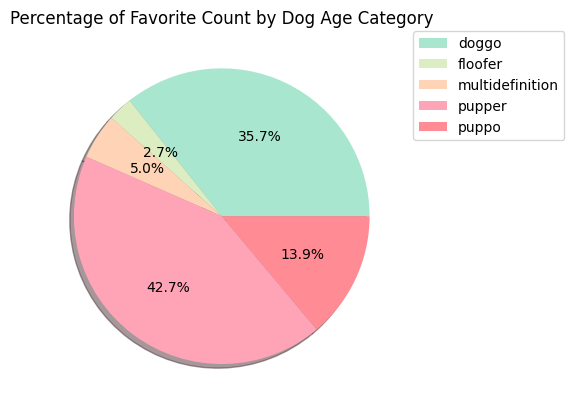

In [107]:
colors = ['#a8e6cf','#dcedc1','#ffd3b6','#ffa3b6', '#ff8b94']

ax = df_favorite_rate.plot(kind="pie", y= 'favorite_count', autopct='%1.1f%%', shadow=True, colors=colors, legend=True, title='Percentage of Favorite Count by Dog Age Category', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

In [108]:
df_master.query('dog_category != "None"').groupby('dog_category')['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_category,,,,,,,,
doggo,63.0,19356.380952,22208.483825,2593.0,8268.00,12376.0,20502.50,131075.0
floofer,7.0,13206.000000,11258.315105,2262.0,5045.50,11302.0,17721.00,33345.0
multidefinition,10.0,17077.200000,15725.294965,4849.0,8799.25,10021.5,15852.00,47844.0
pupper,201.0,7250.527363,10743.931650,693.0,2449.00,3275.0,7842.00,106827.0
puppo,22.0,21582.090909,28034.339585,3277.0,7043.50,13387.5,19691.25,132810.0


- The most favored dog **pupper** age range. It got 42.7% of all favs. **Doggo** comes next with 35.7%.
- Each **doggo** gets an average of ~19.356 Favs while the **pupper** gets ~7250 favs. Therefore each **puppo** gets an average of ~21.582 Favs. 

*Next Question: **Is there a significant difference between Doggo and Puppo?***

**6.3 By Retweet**

In [109]:
df_retweet_rate = df_master.query('dog_category != "None"').groupby('dog_category')[['retweet_count']].sum()
df_retweet_rate

,retweet_count
dog_category,
doggo,448919
floofer,34781
multidefinition,57807
pupper,478883
puppo,142427


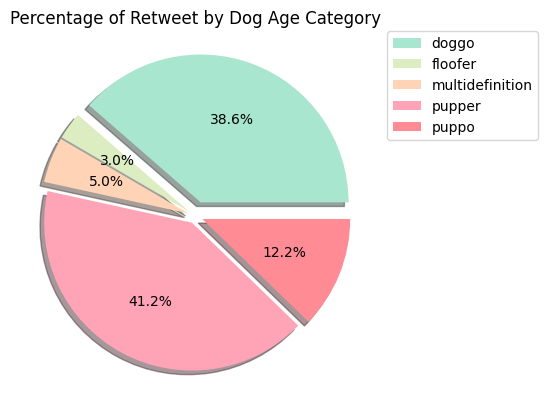

In [110]:
colors = ['#a8e6cf','#dcedc1','#ffd3b6','#ffa3b6', '#ff8b94']

ax = df_retweet_rate.plot(kind="pie", y= 'retweet_count', autopct='%1.1f%%', shadow=True, explode=[0.1, 0.05, 0.05, 0.05, 0.05], colors=colors, legend=True, title='Percentage of Retweet by Dog Age Category', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

In [111]:
df_master.query('dog_category != "None"').groupby('dog_category')['retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_category,,,,,,,,
doggo,63.0,7125.698413,12868.874516,725.0,2025.5,3327.0,5422.00,79515.0
floofer,7.0,4968.714286,6163.579715,496.0,1825.0,3265.0,4436.50,18497.0
multidefinition,10.0,5780.700000,6697.135524,1265.0,2453.0,2822.5,3498.25,19196.0
pupper,201.0,2382.502488,3584.033641,103.0,695.0,1219.0,2475.00,32883.0
puppo,22.0,6473.954545,10301.927187,716.0,1712.5,3130.0,6284.25,48265.0


- The most retweeted dog **doggo** age range (448.919 retweet). It got 41.2% of all retweets. **Doggo** comes next with 38.6%.
- Each **doggo** gets an average of ~7.125 retweet while the **puppo** gets ~6.473 retweet. 

*Next Question: **Is there a significant difference between Doggo and Puppo?*** 

### 7. What is the most popular Dog Breed for Breed Name:
- By rating ratio
- By favorite count
- By retweet count

**7.1 By Rating Ratio**

In [112]:
# By Rating Ratio For Not Categorized as Dog
df_master.query('is_dog_2 == False').groupby('p1')['rating_ratio_cleaned'].describe().sort_values('mean', ascending=True).head()

,count,mean,std,min,25%,50%,75%,max
p1,,,,,,,,
lacewing,1.0,0.1,NaN,0.1,0.1,0.1,0.1,0.1
electric_fan,1.0,0.1,NaN,0.1,0.1,0.1,0.1,0.1
coho,1.0,0.2,NaN,0.2,0.2,0.2,0.2,0.2
maze,1.0,0.2,NaN,0.2,0.2,0.2,0.2,0.2
scorpion,1.0,0.2,NaN,0.2,0.2,0.2,0.2,0.2


In [113]:
# By Rating Ratio For Categorized as Dog
df_master.query('is_dog_2 == True').groupby('breed_name')['rating_ratio_cleaned'].describe().sort_values('mean', ascending=True).head()

,count,mean,std,min,25%,50%,75%,max
breed_name,,,,,,,,
japanese_spaniel,1.0,0.500000,NaN,0.5,0.500,0.50,0.500,0.5
afghan_hound,3.0,0.766667,0.404145,0.3,0.650,1.00,1.000,1.0
soft_coated_wheaten_terrier,10.0,0.850000,0.246080,0.4,0.825,1.00,1.000,1.0
black_and_tan_coonhound,2.0,0.850000,0.212132,0.7,0.775,0.85,0.925,1.0
miniature_schnauzer,4.0,0.850000,0.238048,0.5,0.800,0.95,1.000,1.0


In [114]:
# Who are these car mirros?

df_master.query('p1 == "car_mirror" & is_dog_2 == True')[['p1', 'p2', 'p3', 'total_conf','rating_ratio_cleaned', 'p1_dog', 'p2_dog', 'p3_dog', 'jpg_url']].head()

,p1,p2,p3,total_conf,rating_ratio_cleaned,p1_dog,p2_dog,p3_dog,jpg_url
1130,car_mirror,chesapeake_bay_retriever,vizsla,0.058723,0.9,False,True,True,https://pbs.twimg.com/media/Cas5h-wWcAA3nAc.jpg
1603,car_mirror,basset,beagle,0.099104,0.5,False,True,True,https://pbs.twimg.com/media/CVbodBOUsAAb7jZ.jpg


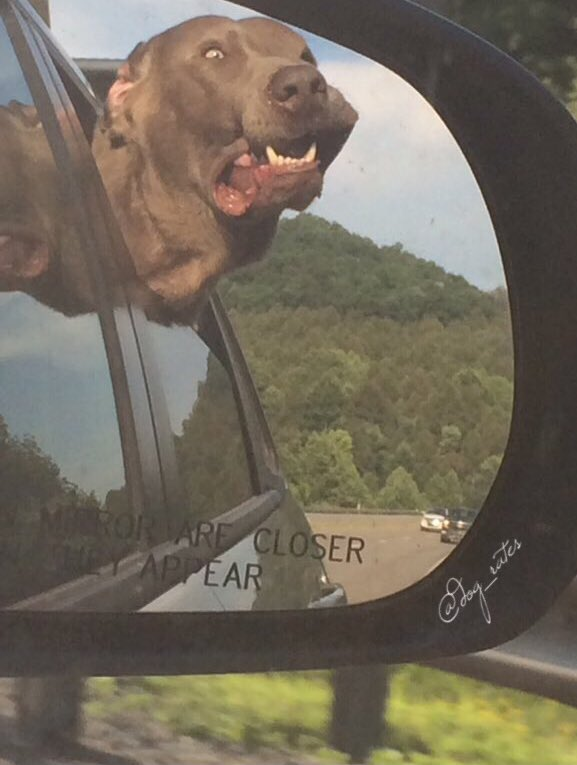

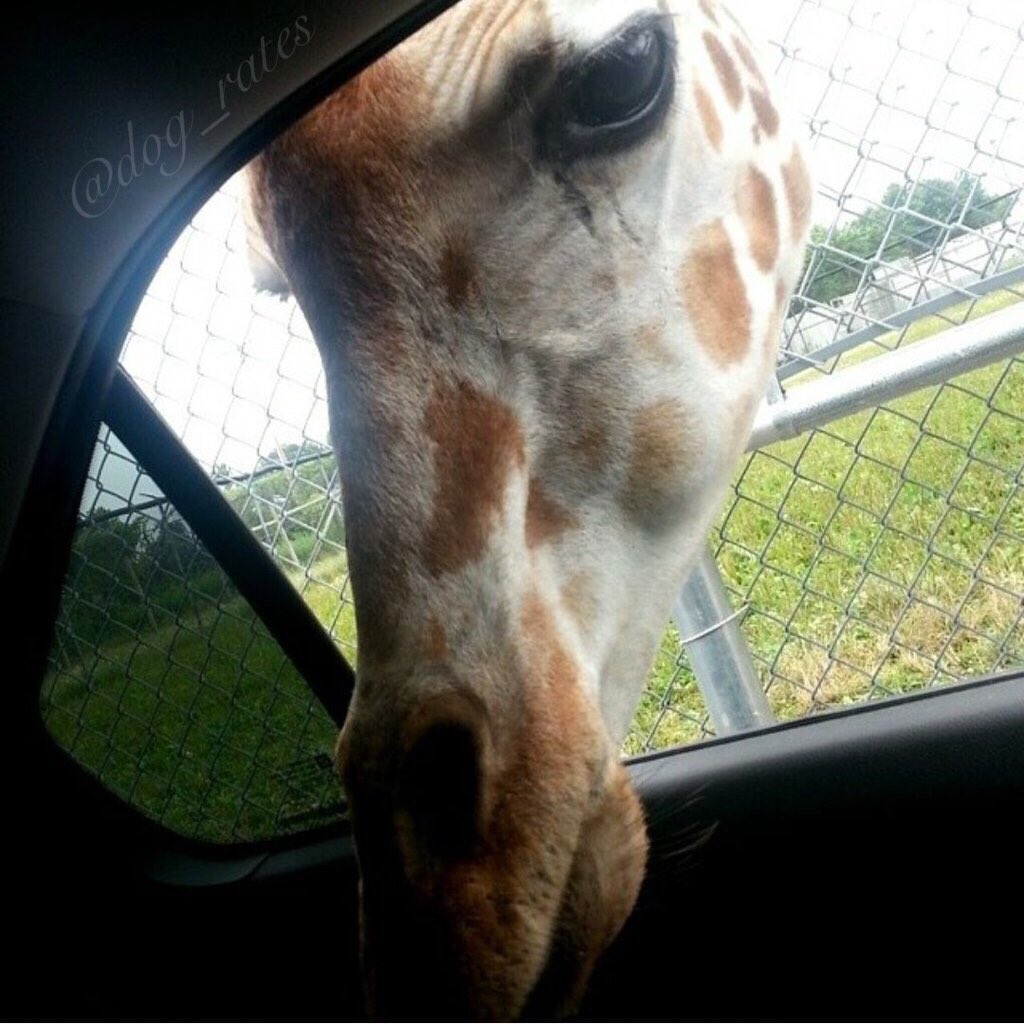

- As I mentioned before when the pictures are not related with dog they get low score.

**Example** Second picture have 0.5 rate and it is not dog

**6.2 By Favorite**

In [115]:
df_master.query('is_dog_2 == True').groupby('breed_name')[['favorite_count']].sum().sort_values('favorite_count', ascending=False).head()

,favorite_count
breed_name,
golden_retriever,1729926
labrador_retriever,1113836
pembroke,994755
chihuahua,674072
samoyed,531052


In [116]:
df_master.query('is_dog_2 == True').groupby('breed_name')['favorite_count'].describe().sort_values('mean', ascending=False).head()

,count,mean,std,min,25%,50%,75%,max
breed_name,,,,,,,,
saluki,4.0,24060.000000,20883.171518,3444.0,10886.25,20637.0,33810.75,51522.0
french_bulldog,27.0,17468.370370,21899.214990,341.0,3356.50,9726.0,24385.00,106827.0
afghan_hound,3.0,17326.666667,10259.517159,7078.0,12191.50,17305.0,22451.00,27597.0
giant_schnauzer,2.0,17314.500000,24154.060539,235.0,8774.75,17314.5,25854.25,34394.0
black_and_tan_coonhound,2.0,17012.000000,23898.794991,113.0,8562.50,17012.0,25461.50,33911.0


In [117]:
df_master.loc[df_master['favorite_count'] == df_master['favorite_count'].max()][['breed_name', 'favorite_count']].value_counts()

breed_name        favorite_count
lakeland_terrier  132810            1
dtype: int64

- The most favorited dog is **golden retriever** (1.729.926). Therefore the rate of meet a **golden retriever** picture on twitter is very high.

- The average favorite dog breed is the **saluki** (24.060 Fav). But there is only 4 **saluki** breed tweeted.

- The **lakeland terrier** is the most favorite dog breed 132.810 times. (In one tweet)

**6.3 By Retweet**

In [118]:
df_master.query('is_dog_2 == True').groupby('breed_name')[['retweet_count']].sum().sort_values('retweet_count', ascending=False).head(5)


,retweet_count
breed_name,
golden_retriever,520591
labrador_retriever,364288
pembroke,280367
chihuahua,219851
samoyed,185856


In [119]:
df_master.query('is_dog_2 == True').groupby('breed_name')['retweet_count'].describe().sort_values('mean', ascending=False).head()

,count,mean,std,min,25%,50%,75%,max
breed_name,,,,,,,,
standard_poodle,7.0,6631.857143,15703.847760,63.0,338.50,888.0,1283.50,42228.0
afghan_hound,3.0,5976.000000,4452.291208,1893.0,3602.50,5312.0,8017.50,10723.0
english_springer,10.0,5401.600000,14251.566613,106.0,284.50,485.0,1783.50,45849.0
giant_schnauzer,2.0,5161.500000,7162.284587,97.0,2629.25,5161.5,7693.75,10226.0
saluki,4.0,5133.750000,4365.237021,1011.0,2511.00,4212.5,6835.25,11099.0


In [120]:
df_master.loc[df_master['retweet_count'] == df_master['retweet_count'].max()][['breed_name', 'retweet_count']].value_counts()

breed_name          retweet_count
labrador_retriever  79515            1
dtype: int64

- The most retweeted dog is **golden retriever** (520.591). There is a very high probability of encountering a **golden retriever** image on twitter.

- The average retweeted dog breed is the **standard poodle** (~6631 Retweeted).

- The **labrador retriever** is the most retweeted dog breed 79.515 times. (In one tweet)

### 7. Further Analysis
- Analysis can be conducted by date column. 
- Also the comments can be perform by statically. 

## End of Notebook